In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH274 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. KS_3_Class.ipynb <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced!<br>
<div/>

# CH274: Key Skills 3
## Functions, Code Design, and Linear Algebra

In this session, we are going to look at some advanced features of the Python programming language, such as:
* How to write functions
* Methods to design a program with reusable code structures (aka functions)
* How to perform linear algebra operations with the numpy and scipy libraries
* How to not reinvent the wheel (using existing functions and libraries)

We will do this by writing a code that will solve a quantum mechanical problem: the particle in a box.

## Quick Recap from Key Skills 1 and Key Skills 2 (CH273)


* you've learned about the basics of Python, variables, strings, printing




In [2]:
a = 1.0 + 2.0
b = 1 + 2
c = '1' + '2'
d = 1.0 + 2.0j # this is a complex number with a real part (1.0) and an imaginary part (2.0j)
print('float     integer    string     complex number')
print(a, ' | ', b,' | ', c,' | ', d)

float     integer    string     complex number
(3.0, ' | ', 3, ' | ', '12', ' | ', (1+2j))


* you've learned how to use numpy to define arrays and lists of numbers and to read in files



In [3]:
import numpy as np
x = np.array([1,2,3,4,5,6,7,8,9,10])
print('This is an array',x)
y = x*x # multiplies each value in x with itself and generates a new array
print('array enable element-wise multiplications')
print('x                                     x*x')
print(x, y)
data = np.loadtxt('STUFF/test.txt')
print(data) #2-dimensional array with 10 rows and 2 columns 
print('Columns and Rows: ', data.shape)
print('Carving out columns:')
print(data[:,0],data[:,1])
print('Carving out rows')
print(data[0,:],data[1,:])

('This is an array', array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
array enable element-wise multiplications
x                                     x*x
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100]))
[[   1.    1.]
 [   2.    4.]
 [   3.    9.]
 [   4.   16.]
 [   5.   25.]
 [   6.   36.]
 [   7.   49.]
 [   8.   64.]
 [   9.   81.]
 [  10.  100.]]
('Columns and Rows: ', (10L, 2L))
Carving out columns:
(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]), array([   1.,    4.,    9.,   16.,   25.,   36.,   49.,   64.,   81.,  100.]))
Carving out rows
(array([ 1.,  1.]), array([ 2.,  4.]))


* you've learned how to iterate through arrays and lists with for-loops



In [4]:
index = 0
for x_val in x:
    y[index] = x_val*x_val
    index = index + 1
print(y)
    
#this can also be written in one line
y = np.array( [x_val*x_val for x_val in x] )
print(y)

[  1   4   9  16  25  36  49  64  81 100]
[  1   4   9  16  25  36  49  64  81 100]


* you've learned how to do basic plotting

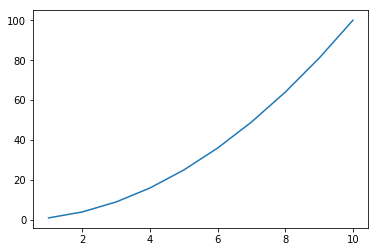

In [6]:
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

***

# The particle in a box in 1D (pib1d)
Here's a quick reminder of the particle in a box 


<div class="col-md-12">
                    </div>
                    <div class="col-md-12">
                    <div class="col-md-4">
                        <img src="STUFF/tik1d.png" alt="Motivation">
                    </div>
                    <div class="col-md-8">
                        <p>  Schrödinger equation (SE): $\hat{H}\psi = E\psi $</p>
                        <p class="">  
                        SE: action of energy operator $\hat{H}$ defines the energy and wave function $\psi$  </p>
                        <p class=""> $$ \hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} +V  $$</p>
                        <p class=" margin-top-10"> boundary conditions: $ \psi(0) = 0 \quad\text{and}\quad \psi(L) = 0 $</p>
                    </div>
                    </div>
                    <div class="col-md-6">
                        <p> **wave functions**</p> 
                        <p> $$ \psi_n(x) = \sqrt{\frac{2}{L}}\sin{\frac{n\pi}{L}}  $$  </p>
                    </div>
                    <div class="col-md-6">
                        <p> **energies** </p>
                        <p> $$ E_n = \frac{\hbar^2\pi^2}{2m}\frac{n^2}{L^2}  $$  </p>
                    </div>

Our approach to **design a code** to calculate the wave functions and the energies shall be as follows:

(1) First we have to think carefully about what different building blocks we need. Each of these elements or building blocks could potentially be designed to be an independent piece of code that can be called as often as we want (This is what we call a **function**.) Functions allow us to package and reuse code without having to modify it. Look at the cells in the Recap section to see examples of non-reusable code (sometimes called 'spagetti' code) 

In the example of the pib1d, we need following building blocks
* a function that sets up the box along the $x$ axis (let's call this function ```make_xgrid```)
* a function that defines the potential and imposes the boundary condition (let's call this function ```potential```)
* a function that sets up the Hamiltonian (let's call this ```create_H```)
* a function that diagonalises the SE: $\hat{H}\psi = E\psi $ to give us $E$ and $\psi$ (```diagonalise_H```)
* a function that plots $E(x)$ and $\psi(x)$ (```generate_plots```)



(2) Then we need to write and test these 5 functions. **Testing** is essential as it enables us to know which parts of the code operate as intended. Tests that assess the validity of individual functions are oftne called **unit tests**.

(3) At the end, when we know that all functions do what they are supposed to do, we write code (can be spagetti code or a function) that executes the functions in the right order. This is typically called the ```main``` or ```program```.



## How do Python functions work?

A function has a definition followed by parantheses, which contain the function arguments. Functions typically also have a return value. See following example:

In [7]:
#Let's import some important packages before we start.
import numpy
#it's nice to abbreviate packages we use a lot, so
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [9]:
def make_xgrid(start, stop, N):
    #note the intendation
    """
    This is the help description of the function. 
    It serves to explain what the function does and what its arguments should be and its return value.
    
    This function has three arguments:
    
    start is a real number which specifies the left boundary of the x axis grid
    stop is a real number which specifies the right boundary of the x axis grid
    N is an integer number which specifies the number of grid points we need for our x axis between 0 and L
    
    The return value of the function is a numpy array, which contains the x axis values.
    
    """
    
    #The numpy function linspace allows us to generate a numpy array which contains N values from 0 to L
    #This array constitutes our x axis
    x = np.linspace(start,stop,N)
    
    #now we simply return the x axis. The return statement ends the function
    return x
    

<div class=warn>

<p>**Task 1** The help string can be accessed by placing a question mark behind the function ```func?```. **Give it a try!** </p>

<p>**Task 2** Let's call the function by issuing ```x = make_xgrid(start, stop, N)```. We want the box to go from 0 to 5, so the grid should have some space to the left and right. Generate an x grid from -1 to 6 with N=200 grid points and print it to screen. </p>
</div>

In [17]:
#TASK 1 <insert code here>


In [18]:
#TASK 2 <insert code here>
x = make_xgrid(-1,6,200)
print(x)

[-1.         -0.96482412 -0.92964824 -0.89447236 -0.85929648 -0.8241206
 -0.78894472 -0.75376884 -0.71859296 -0.68341709 -0.64824121 -0.61306533
 -0.57788945 -0.54271357 -0.50753769 -0.47236181 -0.43718593 -0.40201005
 -0.36683417 -0.33165829 -0.29648241 -0.26130653 -0.22613065 -0.19095477
 -0.15577889 -0.12060302 -0.08542714 -0.05025126 -0.01507538  0.0201005
  0.05527638  0.09045226  0.12562814  0.16080402  0.1959799   0.23115578
  0.26633166  0.30150754  0.33668342  0.3718593   0.40703518  0.44221106
  0.47738693  0.51256281  0.54773869  0.58291457  0.61809045  0.65326633
  0.68844221  0.72361809  0.75879397  0.79396985  0.82914573  0.86432161
  0.89949749  0.93467337  0.96984925  1.00502513  1.04020101  1.07537688
  1.11055276  1.14572864  1.18090452  1.2160804   1.25125628  1.28643216
  1.32160804  1.35678392  1.3919598   1.42713568  1.46231156  1.49748744
  1.53266332  1.5678392   1.60301508  1.63819095  1.67336683  1.70854271
  1.74371859  1.77889447  1.81407035  1.84924623  1.8

#### Potential 
Let's work on the ```potential``` function next! This function needs to calculate the values of the potential well along the x axis grid. This is simply 0 between 0 and L and a very large number outside of the box.

In [38]:
def potential(x, box_l=0.0, box_r=5.0, height=100000.0):
    """
    This function calculates the potential numpy array for a given numpy array of x axis values
    
    argument:
    x np.array : x axis grid
    box_l float :  left boundary value of the box
    box_r float :  right boundary value of the box
    
    return value:
    pot np.array
    """
    
    #the concept of infinity doesn't exist in computers, 
    #so we will assign the value height to any point outside the range [box_l,box_r]
    
    #first, let's generate a potential array which has the same dimension as x, but zeros instead
    pot = np.zeros_like(x)     #isn't numpy great?
    
    for i, xvalue in enumerate(x): #we loop through all x values
        #enumerate is really nice. 
        #It allows us to loop through an array and, for each value, gives us an index i and the actual value xvalue
        if (xvalue<box_l):
            pot[i] = height
        elif (xvalue> box_l and xvalue < box_r):
            pot[i] = 0.0
        elif (xvalue>box_r):
            pot[i] = height
        else:
            #This part of the if-else structure and is a fail-safe. 
            #ALl possible values are covered by the above clauses, so this one should never be reached. 
            #If it is reached, we want the code to through the Python version of a hissy fit - a ValueError.
            #This would lead to a controlled end of the code with this error message on display.
            raise ValueError("COMPUTER SAYS NO. This point should never be reached.")
            
    return pot
    

<div class=warn>
Note that in  ```potential```, the box_l and box_r arguments have values assigned to them. This is called a **default value** and makes the two values **optional arguments**. If we issue the function ```potential``` without box_l or box_r, it will still work, but it will assume their values are 0 and 5, respectively.

<p> **Task 3** Test the potential function by calling it with the above defined x array once with and once without athe box_l and box_r values of 0 and 5 assigned to it. Confirm that the results are identical by plotting pot vs. x! </p>

</div>


[ 100000.  100000.  100000.  100000.  100000.  100000.  100000.  100000.
  100000.  100000.  100000.  100000.  100000.  100000.  100000.  100000.
  100000.  100000.  100000.  100000.  100000.  100000.  100000.  100000.
  100000.  100000.  100000.  100000.  100000.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.      

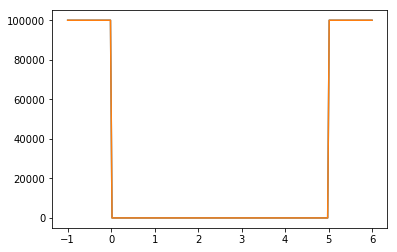

In [39]:
#TASK 3 <insert code here>
pot1 = potential(x)
print(pot1)
pot2 = potential(x,0,5)
print(pot2)

plt.plot(x,pot1)
plt.plot(x,pot2)


## Computational Linear Algebra: Scipy and Numpy are your friends


Alright, the next thing on our list requires some heavier maths, namely the functions ```create_H``` and ```diagonalise_H```.

The function ```create_H``` is supposed to create the Hamiltonian of the pib1d:
\begin{equation}
\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} +V
\end{equation}

We need to create the Hamiltonian in the basis representation that we have chosen, which is the discrete x axis grid. In this representation, the Hamiltonian is an N-by-N matrix, where N is the number of grid points.

We can calculate the potential with our ```potential``` function, but we are missing the kinetic energy contribution. Herefore, we need to calculate a numerical second derivative $d^2/dx^2$ (Laplace operator) with respect to $x$. This is where the numpy matrix routines and the ready-to-use scipy algebra operations will come in very handy.



There are some Python packages, which are absolutely essential to scientific computing. These include numpy, scipy, and matplotlib:
<div class="col-md-12">
<div class="col-md-4">
<a href="https://docs.scipy.org/doc/numpy/user/quickstart.html"> <img src="STUFF/numpy.png"> </a>
</div>
<div class="col-md-4">
<a href="https://docs.scipy.org/doc/scipy/reference/"> <img src="STUFF/scipy.png"> </a>
</div>
<div class="col-md-4">
<a href="https://matplotlib.org/tutorials/index.html"> <img src="STUFF/matplotlib.png"></a>
</div></div>
Click on the images to explore some of their capabilities!

<p> These packages have been designed, so that we do not have to **re-invent the wheel** every time we code something. ```numpy``` enables us to perform complex matrix and vector operations. ```scipy``` allows us to do integration, differentiation, interpolation, linear algebra, you name it! </p>
<br>
<p> ```scipy``` for example, has a function that allows us to construct  a numerical Laplace operator, called <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.laplace.html"> ```scipy.ndimage.laplace```. </a> We can use this to build the kinetic energy operator. (**Rule No. 1 of coding: Always try to see if somebody else has solved the problem already!**</p>





In [40]:
def create_H(x, pot):
    """
    This function creates a Hamiltonian.
    It takes the x axis grid and the potential grid and returns the Hamiltonian matrix.
    """
    
    #We perform our calculations in atomic units, so hbar=1 and our particle has the mass 1
    hbar = 1
    m = 1
    #distance between grid points
    dx = x[1]-x[0]
    
    ###kinetic energy T
    import scipy.ndimage
    #This is the second derivative
    L = scipy.ndimage.laplace(np.eye(len(x)), mode='wrap')/(2.0*dx*dx)
    #Here we add all the constants
    T= -(1./2.)*((hbar**2)/m)*L
    
    #We build the hamiltonian by adding the potential energy to the matrix diagonal
    V = np.diag(pot)   #np.diag takes a list of numbers and puts it onto the diagonal; the offdiagonals are 0
    
    H = T+V
    return H
    

<div class=warn>
<p> **Task 4** Test the create_H function by calling it with the x grid and the potential we have defined earlier. Use the plotting routine below to visualize the magnitude of the matrix elements. What is the structure of the matrix? Does it remind you of somethign you've seen in the lecture? </p>

</div>


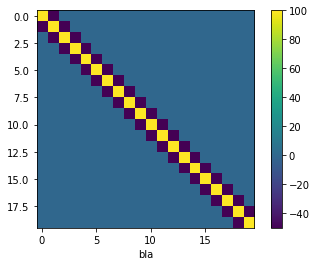

In [41]:
#TASK 4
H = create_H(x,pot1)
#<insert H calculation code here>


plt.imshow(H[:20,:20],vmin=-50, vmax=100);
plt.xlabel('bla')
plt.colorbar()
plt.show()

Now that we have the Hamiltonian, we 'just' need to diagonalise it. Here, again, scipy is of great help. It provides us with the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html">```scipy.linalg.eigh``` </a> function, which calculates the eigenvalues ($E$) and eigenvectors ($\psi$) of a symmetric matrix (H).

In [42]:
def diagonalise_H(H):
    """
    A 'wrapper function' for the eigh function. 
    We call functions 'wrappers' when they do little more but encapsulating an existing function.
    
    The function returns the eigenvalues and the matrix of wave function coefficients.
    
    """
    import scipy.linalg as la
    E, psi = la.eigh(H)
    return E, psi

<div class=warn>
<p> **Task 5** Test the diagonalise_H function by calling it with the H matrix we built before. 
Print the eigenvalues and try to see if they make sense, when compared to:
    $$ E_n = \frac{\hbar^2\pi^2}{2m}\frac{n^2}{L^2} $$
</div>


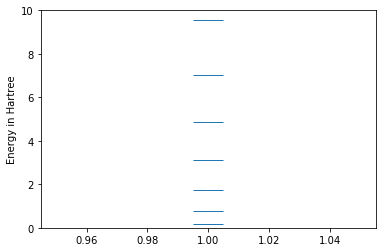

In [43]:
#TASK 5
E, psi = diagonalise_H(H)

#Use these functions to plot the energy
plt.plot(np.ones(len(E)),E,lw=0.0, marker='_',ms=30)
plt.ylim(0,10)
plt.ylabel('Energy in Hartree')

Looks like we just solved the quantum mechanical particle in a box problem. Now we need a fancy visualisation function!

## We need a plotting function

The following function is quite complicated and you don't need to understand it in detail for now. You'll learn more about plotting in the fourth key skills lecture


In [72]:
#### %matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

#def gen_plot_pib1d(x, pot, E, psi):
    
def plot_pib1d(x, pot, E, psi, n=0):
        """
        plots the energies, the wave function and the probability density with interactive handles.
        """

        n=n-1
        import matplotlib.gridspec as gridspec
        plt.figure(figsize=(11, 8), dpi= 80, facecolor='w', edgecolor='k') # figsize determines the actual size of the figure
        gs1 = gridspec.GridSpec(2, 3)
        gs1.update(left=0.05, right=0.90, wspace=0.35,hspace=0.25)
        ax1 = plt.subplot(gs1[: ,0])
        ax2 = plt.subplot(gs1[0, 1:])
        ax3 = plt.subplot(gs1[1, 1:])


        ax1.plot(x, pot, color='gray')
        ax1.plot(np.ones(len(E)), E, lw=0.0, marker='_',ms=4000, color='blue')
        ax1.plot(1, E[n], lw=0.0, marker='_',ms=4000, color='red')
        ax1.set_ylim(-1,21)
        ax2.plot(x, psi[:,n])  
        ax3.plot(x, psi[:,n]*psi[:,n])

        #figure out boundaries
        start=0; stop=0
        for i, p in enumerate(pot):
            if (p>-0.001 and p<0.001):
                start=x[i-1]
                break
        for i, p in enumerate(pot):
            if (p>-0.001 and p<0.001):
                stop=x[i+1]

        ax2.axvline(start, color='gray')
        ax2.axvline(stop, color='gray')  
        ax3.axvline(start, color='gray')
        ax3.axvline(stop, color='gray')
        ax3.axhline(0.0,color='gray')

        #Labeling of x and y axes
        ax1.set_xlabel('x',fontsize=14)
        ax1.set_ylabel('Energy [eV]',fontsize=14)
        ax2.set_ylabel(r'wave function $\psi(x)$',fontsize=14)
        ax3.set_ylabel(r'density $|\psi|^2$(x)',fontsize=14)
        ax2.set_xlabel(r'x',fontsize=14)
        ax3.set_xlabel(r'x',fontsize=14)

        #Show the final result
        plt.show()
        return plot_pib1d
    
# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

interactive_plot = interactive(plot_pib1d,x=fixed(x),pot=fixed(pot1),E=fixed(E),psi=fixed(psi),n=range(1,21))

In [ ]:
interactive_plot

<div class=warn>
<p> **Task 6** Play around with the visualisation! Verify that your functions produce the right physics. You should look out for the following features:
<p> (A) Do the wave functions show the right number of nodal planes? </p>
<p> (B) Do the energy levels follow the $n^2$ behavior? </p>
</div>

In [73]:
#TASK 6 EXECUTE THIS CELL
interactive_plot

## Putting it all together - the `main program`

Now we have all the ingredients we need to build a stand-alone program that performs these operations. We simply generate a ```pib1d``` function which takes arguments and then executes the functions we have generated above in the right order. Some of the sub-function arguments depend on each other and don't need to be set by the user, for example if the box goes from 0 to 5, we can just force the x axis grid to always extend by 1 to the left and to the right. (This is what we call **user interface design**. We don't bother users with too many choices.)


In [81]:
def pib1d(N, box_l, box_r, height=100000.0):
    """
    calculates and visualises the energies and wave functions of the 1d particle in a box
    
    This program takes the number of grid points and the start and end point of the box as arguments and 
    returns a visualisation.
    """
    
    x = make_xgrid(box_l-1.0,box_r+1.0,N)
    pot = potential(x,box_l, box_r, height)
    H = create_H(x,pot)
    E, psi = diagonalise_H(H)
    plot_pib1d = gen_plot_pib1d(x, pot, E, psi)
    interact(plot_pib1d,x=fixed(x),pot=fixed(pot),E=fixed(E),psi=fixed(psi),n=range(1,21))   
    
    #If the function doesn't have a return value, we simply return the logical value true when everything ran smoothly to the end
    return True

In [82]:
#Let's give it a test run

#Number of grid points
N = 200
box_l = 0.0
box_r = 5.0
height = 100000.0
pib1d(N,box_l,box_r, height)

## Let's play with it!

<div class=warn>
**Tasks 7**  
* What happens to the energies when you change the box size?
* What happens when we reduce the height of the box to 25.0? Look at the density at the box edges! (The wave function is tunneling)
<div/>

In [85]:
#TASK
N = #<INSERT VALUE>
box_l = #<INSERT VALUE>
box_r = #<INSERT VALUE>
height = #<INSERT VALUE>
pib1d(N,box_l,box_r, height)

## The power of reusable code - beyond the particle in a box

Because we wrote our code in such a general and reusable way, we can use it for other problems beyond the particle in a box. FOr example, we can simply switch the potential function to something else and describe that. Below, I supply a potential function for a harmonic potential and I changed a single line in the main code (```HO1D```) to calculate the **quantum mechanic harmonic oscillator**

In [89]:
#potential function
def harmonic_potential(x, x0=2.5, k=10.):

    return 0.5*k*(x-x0)*(x-x0)


#new main program where we replaced the potential
def HO1D(N,box_l,box_r, k=10.0):
        
    x = make_xgrid(box_l-1.0,box_r+1.0,N)
    ######ONLY THIS LINE IS DIFFERENT
    x0 = (box_l+box_r)/2
    pot = harmonic_potential(x, x0, k)
    ######END OF DIFFERENCE##########
    H = create_H(x,pot)
    E, psi = diagonalise_H(H)
    plot_pib1d = gen_plot_pib1d(x, pot, E, psi)
    interact(plot_pib1d,x=fixed(x),pot=fixed(pot),E=fixed(E),psi=fixed(psi),n=range(1,21))   
    
    return True

In [90]:
#Number of grid points
N = 200
box_l = 0.0
box_r = 5.0
height = 10.0
HO1D(N,box_l,box_r, height)

True

<div class=warn>
## Tasks
* You can design your own potential functions to play around with this. For example, a box with a kink in the middle, or the Coulomb potential for a hydrogen atom in 1D.<br>
<div/>